In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

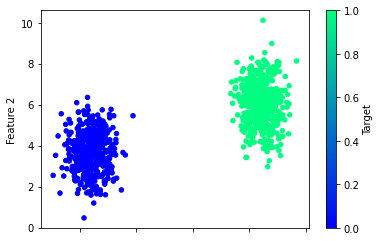

In [3]:
# gen dummy data
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#create df w/ dummy data
df = pd.DataFrame(X, columns=['Feature 1','Feature 2'])
df['Target'] = y

#plot dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [4]:
# sklearn to split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

In [6]:
# create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

#fit scaler
X_scaler.fit(X_train)

#scale data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# add output layer that uses probabiltiy activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [10]:
#check struction of seq model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# compile sequential model t/g and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# fit model to training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 875us/step - loss: 0.4199 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 990us/step - loss: 0.4079 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 744us/step - loss: 0.3564 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3476 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 911us/step - loss: 0.3392 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 952us/step - loss: 0.3311 - accuracy: 1.0000

24/24 [==============================] - 0s 1ms/step - loss: 0.0964 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 997us/step - loss: 0.0950 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 737us/step - loss: 0.0937 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 780us/step - loss: 0.0924 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0873 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 1.0000
Epoch 9

<AxesSubplot:>

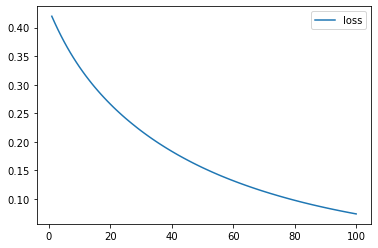

In [14]:
#create df for training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

#plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

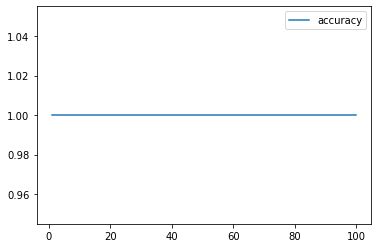

In [15]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [16]:
# evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0696 - accuracy: 1.0000
Loss: 0.06955813616514206, Accuracy: 1.0


In [17]:
# predict clasification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

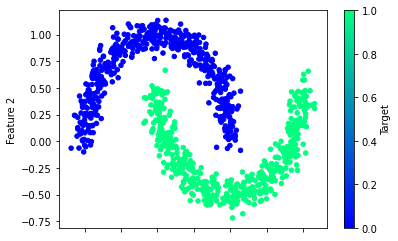

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [20]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [21]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9799 - accuracy: 0.5653
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8437 - accuracy: 0.5907
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7614 - accuracy: 0.6107
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.6293
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6413
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.6547
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.6613
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6733
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.6813
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.6973
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.8907
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2702 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2699 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2684 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8920
Epoch 92/100


<AxesSubplot:>

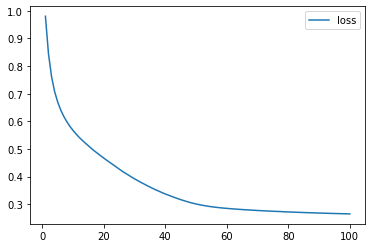

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

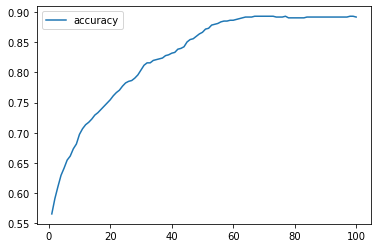

In [23]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 975us/step - loss: 0.5245 - accuracy: 0.8347
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4996 - accuracy: 0.8240
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.8400
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.8613
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8733
Epoch 6/100
24/24 [==============================] - 0s 954us/step - loss: 0.4148 - accuracy: 0.8773
Epoch 7/100
24/24 [==============================] - 0s 911us/step - loss: 0.3968 - accuracy: 0.8787
Epoch 8/100
24/24 [==============================] - 0s 737us/step - loss: 0.3801 - accuracy: 0.8787
Epoch 9/100
24/24 [==============================] - 0s 997us/step - loss: 0.3650 - accuracy: 0.8787
Epoch 10/100
24/24 [==============================] - 0s 954us/step - loss: 0.3513 - accuracy: 0.87

24/24 [==============================] - 0s 738us/step - loss: 0.2120 - accuracy: 0.9027
Epoch 82/100
24/24 [==============================] - 0s 824us/step - loss: 0.2115 - accuracy: 0.9027
Epoch 83/100
24/24 [==============================] - 0s 911us/step - loss: 0.2111 - accuracy: 0.9040
Epoch 84/100
24/24 [==============================] - 0s 824us/step - loss: 0.2106 - accuracy: 0.9040
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2102 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 779us/step - loss: 0.2097 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 780us/step - loss: 0.2091 - accuracy: 0.9080
Epoch 88/100
24/24 [==============================] - 0s 954us/step - loss: 0.2087 - accuracy: 0.9080
Epoch 89/100
24/24 [==============================] - 0s 774us/step - loss: 0.2081 - accuracy: 0.9080
Epoch 90/100
24/24 [==============================] - 0s 737us/step - loss: 0.2077 - accuracy: 0.